#Data Source

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
TRAIN_DIR = os.path.join(os.getcwd(),"/content/mydata/imgs","train")
TEST_DIR = os.path.join(os.getcwd(),"gdrive/My Drive/CBMS_ML_257_TeamProject_Artifacts","Test_Data")

In [ ]:
!unzip /content/gdrive/MyDrive/Data.zip -d mydata 

#Converting the filepaths and foldernames into a dataframe and saving it in a CSV

In [ ]:
##Importing Libraries
import os
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
from sklearn.datasets import load_files
from keras.utils import np_utils
import matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image     
import sklearn.metrics     
from tqdm import tqdm

import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc , roc_auc_score
from tensorflow.keras.layers import InputLayer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from sklearn.model_selection import train_test_split

##TRAIN DATA

In [ ]:
class_names = os.listdir(TRAIN_DIR)
data = list()
if(os.path.isdir(os.path.join(TRAIN_DIR,class_names[0]))):
        for class_name in class_names:
            file_names = os.listdir(os.path.join(TRAIN_DIR,class_name))
            for file in file_names:
                data.append({
                    "Filename":os.path.join(TRAIN_DIR,class_name,file),
                    "ClassName":class_name
                })
data_train = pd.DataFrame(data)

In [ ]:
data_train.tail()

Filename ClassName
22419  /content/mydata/imgs/train/c9/img_69533.jpg        c9
22420  /content/mydata/imgs/train/c9/img_61296.jpg        c9
22421  /content/mydata/imgs/train/c9/img_50127.jpg        c9
22422  /content/mydata/imgs/train/c9/img_73607.jpg        c9
22423  /content/mydata/imgs/train/c9/img_89413.jpg        c9

In [ ]:
data_train['ClassName'].value_counts()

c3    2346
c4    2326
c6    2325
c2    2317
c5    2312
c9    2129
c0    2079
c7    2002
c1    1997
c8    1911
Name: ClassName, dtype: int64

In [ ]:
labels_list = list(set(data_train['ClassName'].values.tolist()))
print(labels_list)

['c6', 'c7', 'c3', 'c9', 'c8', 'c0', 'c2', 'c1', 'c5', 'c4']


In [ ]:
labels_list.sort()

In [ ]:
print(labels_list)

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


In [ ]:
labels_id = {label_name:id for id,label_name in enumerate(labels_list)}
print(labels_id)

{'c0': 0, 'c1': 1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c6': 6, 'c7': 7, 'c8': 8, 'c9': 9}


In [ ]:
#Ref : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
data_train['ClassName'].replace(labels_id,inplace=True)
print(data_train.head())

                                      Filename  ClassName
0  /content/mydata/imgs/train/c2/img_58440.jpg          2
1   /content/mydata/imgs/train/c2/img_2700.jpg          2
2  /content/mydata/imgs/train/c2/img_90299.jpg          2
3  /content/mydata/imgs/train/c2/img_11840.jpg          2
4  /content/mydata/imgs/train/c2/img_39991.jpg          2


In [ ]:
data_train.to_csv (r'gdrive/My Drive/Colab Notebooks/Kaggle/257_Dataset/export_dataframe.csv', index = False, header=True)

In [ ]:
##Only need to run this
data_train = pd.read_csv (r'gdrive/My Drive/Colab Notebooks/Kaggle/257_Dataset/export_dataframe.csv')
data_train.head()

Filename  ClassName
0  /content/mydata/imgs/train/c2/img_58440.jpg          2
1   /content/mydata/imgs/train/c2/img_2700.jpg          2
2  /content/mydata/imgs/train/c2/img_90299.jpg          2
3  /content/mydata/imgs/train/c2/img_11840.jpg          2
4  /content/mydata/imgs/train/c2/img_39991.jpg          2

In [ ]:
#Converting ClassNames to categorical Data
labels = to_categorical(data_train['ClassName'])
print(labels.shape)

(22424, 10)


##TEST DATA 

In [ ]:
class_names = os.listdir(TEST_DIR)
data = list()
if(os.path.isdir(os.path.join(TEST_DIR,class_names[0]))):
        for class_name in class_names:
            file_names = os.listdir(os.path.join(TEST_DIR,class_name))
            for file in file_names:
                data.append({
                    "Filename":os.path.join(TEST_DIR,class_name,file),
                    "ClassName":class_name
                })
data_test = pd.DataFrame(data)

In [ ]:
labels_id = {label_name:id for id,label_name in enumerate(labels_list)}
print(labels_id)

{'c0': 0, 'c1': 1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c6': 6, 'c7': 7, 'c8': 8, 'c9': 9}


In [ ]:
data_test['ClassName'].replace(labels_id,inplace=True)
print(data_test.head())

                                            Filename  ClassName
0  /content/gdrive/My Drive/CBMS_ML_257_TeamProje...          0
1  /content/gdrive/My Drive/CBMS_ML_257_TeamProje...          0
2  /content/gdrive/My Drive/CBMS_ML_257_TeamProje...          0
3  /content/gdrive/My Drive/CBMS_ML_257_TeamProje...          0
4  /content/gdrive/My Drive/CBMS_ML_257_TeamProje...          0


In [ ]:
data_test.to_csv (r'gdrive/My Drive/Colab Notebooks/Kaggle/257_Dataset/export_test_dataframe.csv', index = False, header=True)

In [ ]:
##Only need to run this
data_test = pd.read_csv (r'gdrive/My Drive/Colab Notebooks/Kaggle/257_Dataset/export_test_dataframe.csv')
data_test.head()

Filename  ClassName
0  /content/gdrive/My Drive/CBMS_ML_257_TeamProje...          0
1  /content/gdrive/My Drive/CBMS_ML_257_TeamProje...          0
2  /content/gdrive/My Drive/CBMS_ML_257_TeamProje...          0
3  /content/gdrive/My Drive/CBMS_ML_257_TeamProje...          0
4  /content/gdrive/My Drive/CBMS_ML_257_TeamProje...          0

In [ ]:
test_labels = to_categorical(data_test['ClassName'])
print(test_labels.shape)

(295, 10)


#Visualizing the Class Balance

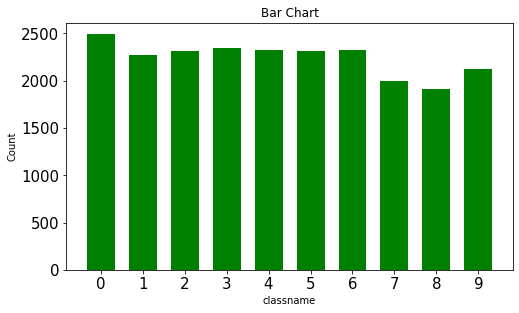

In [ ]:
nf = data_train['ClassName'].value_counts(sort=False)
labels = data_train['ClassName'].value_counts(sort=False).index.tolist()
y = np.array(nf)
width = 1/1.5
N = len(y)
x = range(N)

fig = plt.figure(figsize=(8,10))
ay = fig.add_subplot(211)

plt.xticks(x, labels, size=15)
plt.yticks(size=15)

ay.bar(x, y, width, color="green")

plt.title('Bar Chart')
plt.xlabel('classname')
plt.ylabel('Count')

plt.show()

#1st Approach

##Dividing Training data into train and validation

In [ ]:

xtrain,xval,ytrain,yval = train_test_split(data_train.iloc[:,0],labels,test_size = 0.2,random_state=42)

In [ ]:
print(xtrain.shape,xval.shape,ytrain.shape,yval.shape)

(17939,) (4485,) (17939, 10) (4485, 10)


##Rescaling the image to  - 224 X 244 X 3

In [ ]:
from keras.preprocessing import image  
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [ ]:
# pre-process the data for Keras
##For CNN, your input must be a 4-D tensor [batch_size, width, height, channels], so each image is a 3-D sub-tensor.
train_tensors = paths_to_tensor(xtrain).astype('float32')/255 - 0.5

100%|██████████| 17939/17939 [01:24<00:00, 212.85it/s]


In [ ]:
print(train_tensors.shape)

(17939, 224, 224, 3)


In [ ]:
valid_tensors = paths_to_tensor(xval).astype('float32')/255 - 0.5

100%|██████████| 4485/4485 [00:41<00:00, 108.06it/s]


In [ ]:
print(valid_tensors.shape)

(4485, 224, 224, 3)


In [ ]:
print(train_tensors.shape,ytrain.shape,valid_tensors.shape,yval.shape)

(17939, 224, 224, 3) (17939, 10) (4485, 224, 224, 3) (4485, 10)


In [ ]:
test_tensors = paths_to_tensor(data_test.iloc[:,0]).astype('float32')/255 - 0.5

100%|██████████| 295/295 [02:45<00:00,  1.78it/s]


In [ ]:
print(test_tensors.shape)

(295, 224, 224, 3)


In [ ]:
Class_Name = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind', 
               'hair and makeup', 'talking to passenger']
## c0: safe driving
# c1: texting - right
# c2: talking on the phone - right
# c3: texting - left
# c4: talking on the phone - left
# c5: operating the radio
# c6: drinking
# c7: reaching behind
# c8: hair and makeup
# c9: talking to passenger               

###CNN Model - Model 1 

In [ ]:
model = Sequential()
# 64 conv2d filters with relu
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224 ,3), kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=2)) #Maxpool
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=2)) #Maxpool
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=2)) #Maxpool
model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=2)) #Maxpool
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', kernel_initializer='glorot_normal'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 64)      832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 128)     32896     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 256)       131328    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 512)      

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 20
model_history = model.fit(train_tensors,ytrain,validation_data = (valid_tensors, yval),epochs=epochs, batch_size=40, shuffle=True)

Epoch 1/20
449/449 [==============================] - 47s 104ms/step - loss: 0.8640 - accuracy: 0.7223 - val_loss: 0.1027 - val_accuracy: 0.9730
Epoch 2/20
449/449 [==============================] - 46s 102ms/step - loss: 0.1288 - accuracy: 0.9616 - val_loss: 0.0574 - val_accuracy: 0.9880
Epoch 3/20
449/449 [==============================] - 46s 102ms/step - loss: 0.0761 - accuracy: 0.9782 - val_loss: 0.0606 - val_accuracy: 0.9862
Epoch 4/20
449/449 [==============================] - 46s 102ms/step - loss: 0.0600 - accuracy: 0.9836 - val_loss: 0.0691 - val_accuracy: 0.9868
Epoch 5/20
449/449 [==============================] - 46s 102ms/step - loss: 0.0444 - accuracy: 0.9871 - val_loss: 0.0471 - val_accuracy: 0.9924
Epoch 6/20
449/449 [==============================] - 46s 102ms/step - loss: 0.0483 - accuracy: 0.9878 - val_loss: 0.0340 - val_accuracy: 0.9940
Epoch 7/20
449/449 [==============================] - 46s 102ms/step - loss: 0.0439 - accuracy: 0.9887 - val_loss: 0.0407 - val_ac

In [ ]:
hist = pd.DataFrame(model_history.history)
hist['epoch'] = model_history.epoch
hist.tail(5)

loss  accuracy  val_loss  val_accuracy  epoch
15  0.052626  0.989130  0.107246      0.994649     15
16  0.058365  0.989130  0.050178      0.996656     16
17  0.053496  0.988461  0.045450      0.995764     17
18  0.061099  0.989018  0.035166      0.996656     18
19  0.067647  0.988628  0.100690      0.990412     19

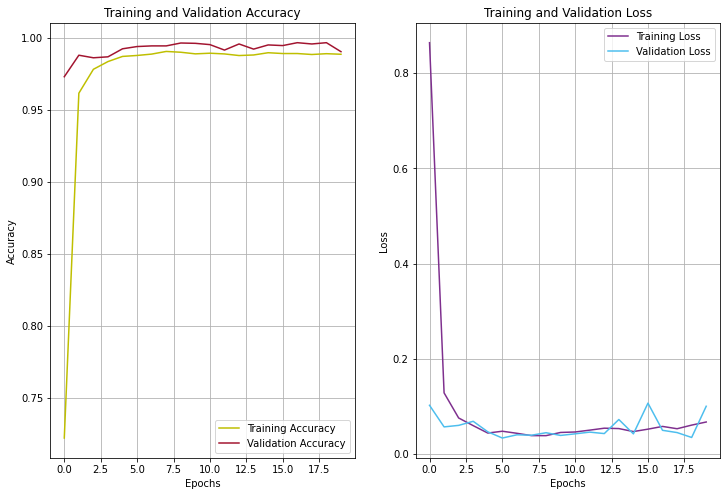

In [ ]:
epochs_range = range(epochs)

fig=plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, hist['accuracy'], label='Training Accuracy', color=[0.75, 0.75, 0])
plt.plot(epochs_range, hist['val_accuracy'], label='Validation Accuracy', color= 	[0.6350, 0.0780, 0.1840])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, hist['loss'], label='Training Loss', color=	[0.4940, 0.1840, 0.5560])
plt.plot(epochs_range, hist['val_loss'], label='Validation Loss', color= [0.3010, 0.7450, 0.9330])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()
#fig.savefig('TrainHistory_LSTM_1.pdf')

In [ ]:
loss, accuracy = model.evaluate(train_tensors, ytrain, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy*100))

val_loss, val_accuracy = model.evaluate(valid_tensors, yval, verbose=False)
print("Validation Accuracy:  {:.4f}".format(val_accuracy*100))

Training Accuracy: 99.5039
Validation Accuracy:  99.0412


In [ ]:
#Predicting on the Validation Data
y_predict_validation = model.predict(valid_tensors)
# Classification Reports
##Converting on hote encoded labels and predictions to single-digit ones
report_classification = classification_report(np.argmax(yval,axis=1), np.argmax(y_predict_validation,axis=1), target_names = Class_Name)
print(report_classification)

                              precision    recall  f1-score   support

                safe driving       0.98      1.00      0.99       519
             texting - right       1.00      0.98      0.99       444
talking on the phone - right       0.99      1.00      1.00       429
              texting - left       1.00      0.98      0.99       476
 talking on the phone - left       0.99      1.00      0.99       451
         operating the radio       1.00      0.99      1.00       457
                    drinking       1.00      1.00      1.00       473
             reaching behind       0.99      1.00      0.99       439
             hair and makeup       0.99      0.97      0.98       402
        talking to passenger       0.96      0.99      0.98       395

                    accuracy                           0.99      4485
                   macro avg       0.99      0.99      0.99      4485
                weighted avg       0.99      0.99      0.99      4485



In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

def print_heatmap(n_labels, n_predictions, class_names):
    labels = n_labels #sess.run(tf.argmax(n_labels, 1))
    predictions = n_predictions #sess.run(tf.argmax(n_predictions, 1))

#     confusion_matrix = sess.run(tf.contrib.metrics.confusion_matrix(labels, predictions))
    matrix = confusion_matrix(labels.argmax(axis=1),predictions.argmax(axis=1))
    row_sum = np.sum(matrix, axis = 1)
    w, h = matrix.shape

    c_m = np.zeros((w, h))

    for i in range(h):
        c_m[i] = matrix[i] * 100 / row_sum[i]

    c = c_m.astype(dtype = np.uint8)

    
    heatmap = print_confusion_matrix(c, class_names, figsize=(18,10), fontsize=20)

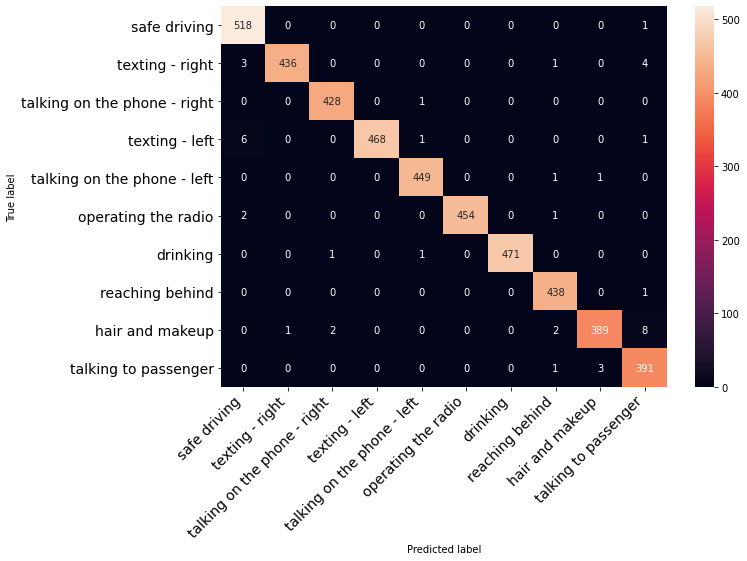

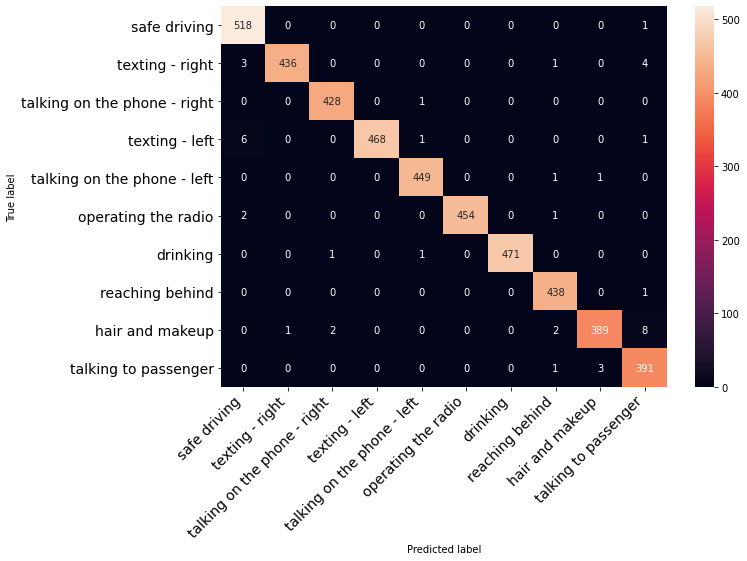

In [ ]:
# Creates a confusion matrix
cm = confusion_matrix(np.argmax(yval,axis=1), np.argmax(y_predict_validation,axis=1)) 
print_confusion_matrix(cm,Class_Name)

Model Prediction on Test (unseen Data)

In [ ]:
##Model Prediction on test (unseen Data)
test_loss, test_accuracy = model.evaluate(test_tensors, test_labels, verbose=False)
print("Testing Accuracy:  {:.4f}".format(test_accuracy*100))

Testing Accuracy:  55.9322


In [ ]:
#Predicting on the Testing Data
y_predict_test = model.predict(test_tensors)

# Classification Reports
report_classification = classification_report(np.argmax(test_labels,axis=1), np.argmax(y_predict_test,axis=1), target_names = Class_Name)
print(report_classification)

                              precision    recall  f1-score   support

                safe driving       0.44      0.63      0.52        38
             texting - right       0.78      0.50      0.61        36
talking on the phone - right       0.75      0.41      0.53        37
              texting - left       0.83      0.37      0.51        27
 talking on the phone - left       0.69      0.51      0.59        35
         operating the radio       0.68      1.00      0.81        32
                    drinking       0.55      0.52      0.53        31
             reaching behind       0.66      0.66      0.66        35
             hair and makeup       0.24      0.67      0.35         6
        talking to passenger       0.16      0.28      0.20        18

                    accuracy                           0.56       295
                   macro avg       0.58      0.55      0.53       295
                weighted avg       0.63      0.56      0.57       295



##Rescaling the image to - 128 X 128 X 3

In [ ]:
from keras.preprocessing import image  
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(128, 128))
    # convert PIL.Image.Image type to 3D tensor with shape (128, 128, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 128, 128, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [ ]:
# pre-process the data for Keras
##For CNN, your input must be a 4-D tensor [batch_size, width, height, channels], so each image is a 3-D sub-tensor.
#train_tensors_128 = paths_to_tensor(xtrain).astype('float32')/255 - 0.5
train_tensors_128 = paths_to_tensor(xtrain)


100%|██████████| 17939/17939 [02:03<00:00, 145.51it/s]


In [ ]:
print(train_tensors_128.shape)

(17939, 128, 128, 3)


In [ ]:
valid_tensors_128 = paths_to_tensor(xval)


100%|██████████| 4485/4485 [00:25<00:00, 176.95it/s]


In [ ]:
print(valid_tensors_128.shape)

(4485, 128, 128, 3)


In [ ]:
print(train_tensors_128.shape,ytrain.shape,valid_tensors_128.shape,yval.shape)

(17939, 128, 128, 3) (17939, 10) (4485, 128, 128, 3) (4485, 10)


In [ ]:
test_tensors_128 = paths_to_tensor(data_test.iloc[:,0])


100%|██████████| 295/295 [00:01<00:00, 191.15it/s]


In [ ]:
print(test_tensors_128.shape)

(295, 128, 128, 3)


In [ ]:
Class_Name = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind', 
               'hair and makeup', 'talking to passenger']
## c0: safe driving
# c1: texting - right
# c2: talking on the phone - right
# c3: texting - left
# c4: talking on the phone - left
# c5: operating the radio
# c6: drinking
# c7: reaching behind
# c8: hair and makeup
# c9: talking to passenger               

###CNN Model - Model 2

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32,kernel_size=(5,5),strides = (1,1),padding='same',activation='relu',name='Conv_1'))
model.add(keras.layers.MaxPool2D(pool_size = (2,2),name = 'Pool_1'))#Image_size: 32*128*128(32 filters,image_size 128*128)
model.add(Conv2D( filters = 64, kernel_size = (5,5), strides = (1,1), padding = 'same', activation = 'relu', name = 'Conv_2'))
model.add(keras.layers.MaxPool2D(pool_size = (2,2),name = 'Pool_2'))
model.add(Conv2D(  filters = 128,  kernel_size = (5,5),  strides = (1,1),  padding = 'same',  activation = 'relu',  name = 'Conv_3'))
model.add(keras.layers.MaxPool2D(pool_size = (2,2),name = 'Pool_3'))
model.add(Conv2D(filters = 256,kernel_size = (5,5),strides = (1,1),padding = 'same',activation = 'relu',name = 'Conv_4'))
model.add(keras.layers.MaxPool2D(   pool_size = (2,2),   name = 'Pool_4'))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu',name = 'fc_1'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=512, activation='relu',name = 'fc_2'))
model.add(Dense(units=10,activation='softmax',name = 'fc_3'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
Pool_1 (MaxPooling2D)        (None, 64, 64, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 64, 64, 64)        51264     
_________________________________________________________________
Pool_2 (MaxPooling2D)        (None, 32, 32, 64)        0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 32, 32, 128)       204928    
_________________________________________________________________
Pool_3 (MaxPooling2D)        (None, 16, 16, 128)       0         
_________________________________________________________________
Conv_4 (Conv2D)              (None, 16, 16, 256)      

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(from_logits = False), metrics = ['accuracy'])
epochs = 10
history = model.fit(train_tensors_128,ytrain,validation_data = (valid_tensors_128, yval),epochs = epochs, batch_size = 500, verbose = 1)

Epoch 1/10
36/36 [==============================] - 10s 281ms/step - loss: 12.8203 - accuracy: 0.2401 - val_loss: 1.3092 - val_accuracy: 0.5331
Epoch 2/10
36/36 [==============================] - 8s 232ms/step - loss: 0.8056 - accuracy: 0.7328 - val_loss: 0.3178 - val_accuracy: 0.9095
Epoch 3/10
36/36 [==============================] - 8s 233ms/step - loss: 0.2543 - accuracy: 0.9253 - val_loss: 0.1350 - val_accuracy: 0.9625
Epoch 4/10
36/36 [==============================] - 8s 233ms/step - loss: 0.1146 - accuracy: 0.9672 - val_loss: 0.0830 - val_accuracy: 0.9799
Epoch 5/10
36/36 [==============================] - 8s 233ms/step - loss: 0.0687 - accuracy: 0.9792 - val_loss: 0.0609 - val_accuracy: 0.9842
Epoch 6/10
36/36 [==============================] - 8s 233ms/step - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.0595 - val_accuracy: 0.9837
Epoch 7/10
36/36 [==============================] - 8s 232ms/step - loss: 0.0406 - accuracy: 0.9875 - val_loss: 0.0543 - val_accuracy: 0.9868
Epoc

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(5)

loss  accuracy  val_loss  val_accuracy  epoch
5  0.043428  0.986900  0.059478      0.983724      5
6  0.040553  0.987513  0.054261      0.986845      6
7  0.025888  0.991694  0.041629      0.989298      7
8  0.021685  0.992753  0.047129      0.988183      8
9  0.014907  0.995039  0.043547      0.987960      9

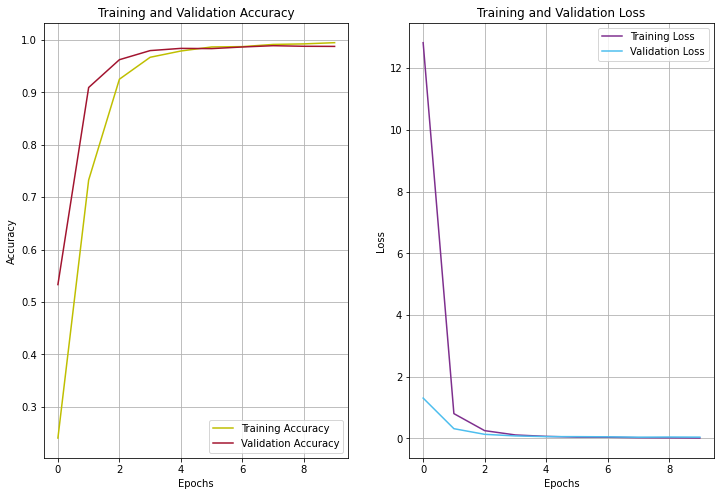

In [ ]:
epochs_range = range(epochs)

fig=plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, hist['accuracy'], label='Training Accuracy', color=[0.75, 0.75, 0])
plt.plot(epochs_range, hist['val_accuracy'], label='Validation Accuracy', color= 	[0.6350, 0.0780, 0.1840])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, hist['loss'], label='Training Loss', color=	[0.4940, 0.1840, 0.5560])
plt.plot(epochs_range, hist['val_loss'], label='Validation Loss', color= [0.3010, 0.7450, 0.9330])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()
#fig.savefig('TrainHistory_LSTM_1.pdf')

In [ ]:
loss, accuracy = model.evaluate(train_tensors_128, ytrain, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy*100))

val_loss, val_accuracy = model.evaluate(valid_tensors_128, yval, verbose=False)
print("Validation Accuracy:  {:.4f}".format(val_accuracy*100))

Training Accuracy: 99.7046
Validation Accuracy:  98.7960


In [ ]:
#Predicting on the Validation Data
y_predict_validation = model.predict(valid_tensors_128)
# Classification Reports
##Converting on hote encoded labels and predictions to single-digit ones
report_classification = classification_report(np.argmax(yval,axis=1), np.argmax(y_predict_validation,axis=1), target_names = Class_Name)
print(report_classification)

                              precision    recall  f1-score   support

                safe driving       0.99      0.99      0.99       519
             texting - right       0.96      1.00      0.98       444
talking on the phone - right       0.99      0.99      0.99       429
              texting - left       1.00      1.00      1.00       476
 talking on the phone - left       1.00      1.00      1.00       451
         operating the radio       1.00      0.99      1.00       457
                    drinking       1.00      1.00      1.00       473
             reaching behind       0.97      1.00      0.99       439
             hair and makeup       0.98      0.96      0.97       402
        talking to passenger       0.99      0.96      0.97       395

                    accuracy                           0.99      4485
                   macro avg       0.99      0.99      0.99      4485
                weighted avg       0.99      0.99      0.99      4485



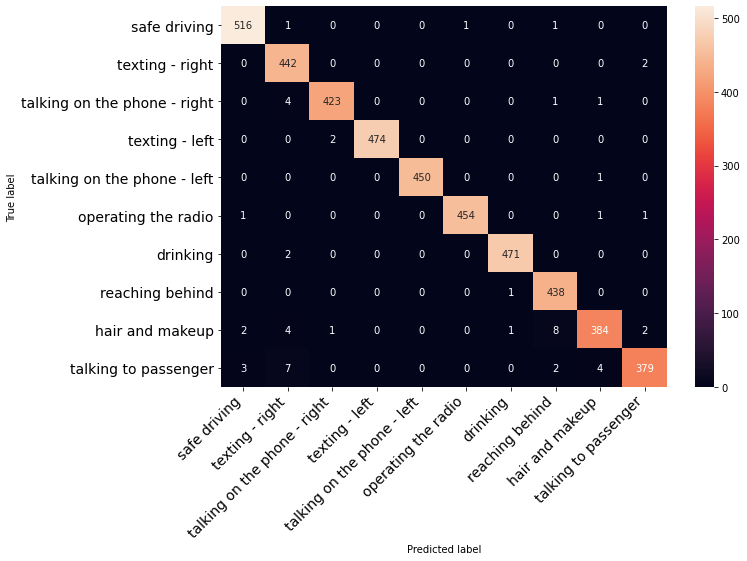

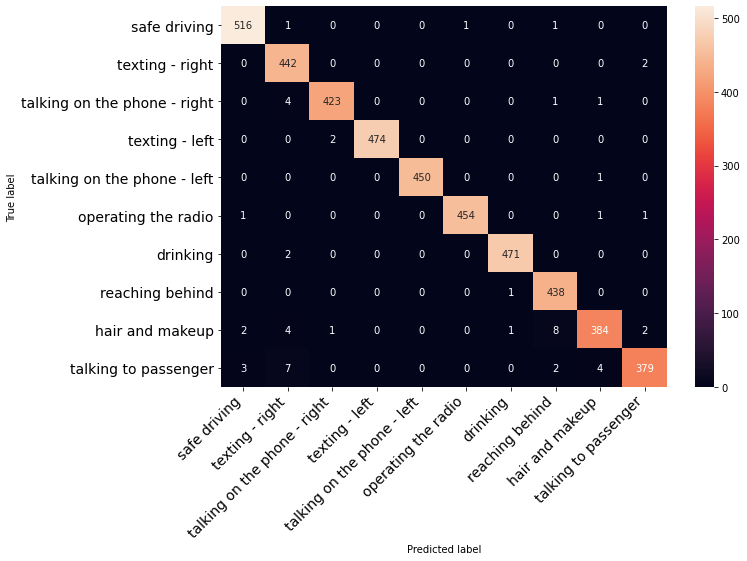

In [ ]:
# Creates a confusion matrix
cm = confusion_matrix(np.argmax(yval,axis=1), np.argmax(y_predict_validation,axis=1)) 
print_confusion_matrix(cm,Class_Name)

Model Prediction on Test (unseen Data)

In [ ]:
##Model Prediction on test (unseen Data)
test_loss, test_accuracy = model.evaluate(test_tensors_128, test_labels, verbose=False)
print("Testing Accuracy:  {:.4f}".format(test_accuracy*100))

Testing Accuracy:  51.8644


In [ ]:
#Predicting on the Testing Data
y_predict_test = model.predict(test_tensors_128)
# Classification Reports
report_classification = classification_report(np.argmax(test_labels,axis=1), np.argmax(y_predict_test,axis=1), target_names = Class_Name)
print(report_classification)

                              precision    recall  f1-score   support

                safe driving       0.50      0.24      0.32        38
             texting - right       0.49      0.72      0.58        36
talking on the phone - right       0.59      0.35      0.44        37
              texting - left       0.50      0.30      0.37        27
 talking on the phone - left       0.60      0.51      0.55        35
         operating the radio       0.83      0.91      0.87        32
                    drinking       0.49      0.61      0.54        31
             reaching behind       0.57      0.71      0.63        35
             hair and makeup       0.17      0.67      0.27         6
        talking to passenger       0.14      0.11      0.12        18

                    accuracy                           0.52       295
                   macro avg       0.49      0.51      0.47       295
                weighted avg       0.54      0.52      0.51       295



#2nd Approach  

##Train Validation Split based on Drivers

In [ ]:
#Importing Libraries 
import os
import random
import numpy as np
import pandas as pd 
from skimage import io
from skimage import color
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")



import keras
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image 
from keras.layers.normalization import BatchNormalization
from keras import optimizers

In [ ]:
Class_Name = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind', 
               'hair and makeup', 'talking to passenger']

In [ ]:
driver_details = pd.read_csv('/content/mydata/driver_imgs_list.csv',na_values='na')
print(driver_details.head(5))

  subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg


In [ ]:
## Getting all the images
train_image = []
image_label = []


for i in range(10):
    print('now we are in the folder C',i)
    imgs = os.listdir("/content/mydata/imgs/train/c"+str(i))
    for j in range(len(imgs)):
    #for j in range(100):
        img_name = "/content/mydata/imgs/train/c"+str(i)+"/"+imgs[j]
        img = cv2.imread(img_name)
        #img = color.rgb2gray(img)
        img = img[50:,120:-50]
        img = cv2.resize(img,(224,224))
        label = i
        driver = driver_details[driver_details['img'] == imgs[j]]['subject'].values[0]
        train_image.append([img,label,driver])
        image_label.append(i)

now we are in the folder C 0
now we are in the folder C 1
now we are in the folder C 2
now we are in the folder C 3
now we are in the folder C 4
now we are in the folder C 5
now we are in the folder C 6
now we are in the folder C 7
now we are in the folder C 8
now we are in the folder C 9


In [ ]:
print(len(train_image),len(image_label))

22424 22424


In [ ]:
print(image_label)

In [ ]:
## Randomly shuffling the images

import random
random.shuffle(train_image)

In [ ]:
driv_selected = ['p050', 'p015', 'p022', 'p056']

In [ ]:
## Splitting the train and test

X_train= []
y_train = []
X_test = []
y_test = []
D_train = []
D_test = []

for features,labels,drivers in train_image:
    if drivers in driv_selected:
        X_test.append(features)
        y_test.append(labels)
        D_test.append(drivers)
    
    else:
        X_train.append(features)
        y_train.append(labels)
        D_train.append(drivers)
    
print (len(X_train),len(X_test))
print (len(y_train),len(y_test))

18732 3692
18732 3692


In [ ]:
print (len(D_train),len(D_test))

18732 3692


In [ ]:
print(y_train)

[2, 4, 3, 8, 6, 5, 0, 8, 4, 0, 3, 7, 8, 1, 1, 0, 7, 0, 7, 3, 0, 5, 1, 9, 6, 0, 0, 3, 0, 9, 0, 9, 7, 0, 7, 9, 1, 9, 3, 2, 7, 5, 9, 1, 2, 0, 0, 3, 6, 8, 5, 1, 1, 5, 3, 9, 0, 5, 3, 4, 2, 7, 3, 4, 0, 6, 3, 5, 1, 9, 1, 2, 2, 3, 7, 6, 6, 0, 5, 6, 5, 2, 3, 4, 9, 5, 8, 3, 9, 8, 8, 3, 3, 1, 2, 2, 3, 8, 5, 7, 5, 5, 6, 7, 5, 7, 4, 8, 1, 9, 1, 3, 7, 3, 1, 6, 7, 2, 6, 4, 3, 5, 1, 5, 0, 6, 0, 7, 9, 4, 3, 3, 4, 6, 8, 1, 2, 4, 4, 3, 6, 4, 1, 2, 1, 4, 8, 5, 5, 3, 9, 7, 0, 8, 6, 9, 5, 8, 7, 0, 0, 9, 5, 2, 5, 6, 6, 6, 7, 2, 5, 4, 0, 1, 6, 8, 4, 3, 7, 0, 8, 0, 4, 2, 2, 3, 7, 4, 4, 4, 4, 2, 7, 8, 9, 2, 8, 1, 3, 6, 2, 8, 5, 5, 5, 1, 9, 6, 2, 3, 7, 8, 3, 6, 0, 9, 9, 5, 8, 5, 2, 6, 3, 7, 8, 3, 9, 6, 1, 5, 9, 6, 1, 6, 4, 6, 0, 1, 1, 8, 8, 8, 8, 6, 1, 5, 4, 5, 1, 8, 4, 9, 9, 7, 6, 3, 0, 2, 5, 1, 9, 5, 8, 1, 4, 4, 3, 4, 7, 7, 1, 0, 4, 3, 4, 7, 8, 4, 0, 1, 0, 5, 3, 3, 1, 8, 2, 5, 3, 0, 2, 2, 9, 7, 7, 3, 4, 4, 4, 9, 7, 3, 4, 4, 9, 0, 6, 3, 5, 6, 4, 5, 6, 6, 9, 8, 6, 3, 9, 0, 6, 6, 1, 0, 1, 9, 4, 2, 9, 7, 2, 9, 6, 

In [ ]:
type(y_train)

list

In [ ]:
## Converting images to nparray. Encoding the Y

X_train = np.array(X_train).reshape(-1,224,224,3)
X_test = np.array(X_test).reshape(-1,224,224,3)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


print (X_train.shape ,y_train.shape)

(18732, 224, 224, 3) (18732, 10)


**Saving the numpy arrays of train and validation for ease in frequent use**

In [ ]:
from numpy import save
save('/content/gdrive/MyDrive/CBMS_ML_257_TeamProject_Artifacts/Xtrain.npy',X_train)
save('/content/gdrive/MyDrive/CBMS_ML_257_TeamProject_Artifacts/ytrain.npy',y_train)
save('/content/gdrive/MyDrive/CBMS_ML_257_TeamProject_Artifacts/Xtest.npy',X_test)
save('/content/gdrive/MyDrive/CBMS_ML_257_TeamProject_Artifacts/Ytest.npy',y_test)
save('/content/gdrive/MyDrive/CBMS_ML_257_TeamProject_Artifacts/Dtrain.npy',D_train)
save('/content/gdrive/MyDrive/CBMS_ML_257_TeamProject_Artifacts/Dtest.npy',D_test)

In [ ]:
from numpy import load
# Load previously saved normalized pre-processed  validation data 
#X_train = load('/content/gdrive/My Drive/Colab Notebooks/Kaggle/257_Dataset/validationdata.npy')
X_train =load('/content/gdrive/MyDrive/CBMS_ML_257_TeamProject_Artifacts/Xtrain.npy')
y_train = load('/content/gdrive/MyDrive/CBMS_ML_257_TeamProject_Artifacts/ytrain.npy')
X_test = load('/content/gdrive/MyDrive/CBMS_ML_257_TeamProject_Artifacts/Xtest.npy')
y_test = load('/content/gdrive/MyDrive/CBMS_ML_257_TeamProject_Artifacts/Ytest.npy')
D_train = load('/content/gdrive/MyDrive/CBMS_ML_257_TeamProject_Artifacts/Dtrain.npy')
D_test = load('/content/gdrive/MyDrive/CBMS_ML_257_TeamProject_Artifacts/Dtest.npy')

In [ ]:
print (X_train.shape ,y_train.shape,X_test.shape ,y_test.shape)

(18732, 224, 224, 3) (18732, 10) (3692, 224, 224, 3) (3692, 10)


##CNN Model - Model 1 

In [ ]:
model = Sequential()
# 64 conv2d filters with relu
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224 ,3), kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=2)) #Maxpool
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=2)) #Maxpool
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=2)) #Maxpool
model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=2)) #Maxpool
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(10, activation='softmax', kernel_initializer='glorot_normal'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 224, 224, 64)      832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 128)     32896     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 56, 56, 256)       131328    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 256)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 512)      

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 40
model_history = model.fit(X_train,y_train,validation_data = (X_test, y_test),epochs=epochs, batch_size=100, shuffle=True)

Epoch 1/40
188/188 [==============================] - 23s 124ms/step - loss: 0.0461 - accuracy: 0.9941 - val_loss: 10.9001 - val_accuracy: 0.4236
Epoch 2/40
188/188 [==============================] - 23s 123ms/step - loss: 0.0441 - accuracy: 0.9949 - val_loss: 9.2014 - val_accuracy: 0.4645
Epoch 3/40
188/188 [==============================] - 23s 123ms/step - loss: 0.0449 - accuracy: 0.9954 - val_loss: 10.4771 - val_accuracy: 0.4350
Epoch 4/40
188/188 [==============================] - 23s 123ms/step - loss: 0.0357 - accuracy: 0.9964 - val_loss: 10.8689 - val_accuracy: 0.5051
Epoch 5/40
188/188 [==============================] - 23s 123ms/step - loss: 0.0648 - accuracy: 0.9951 - val_loss: 16.8916 - val_accuracy: 0.3711
Epoch 6/40
188/188 [==============================] - 23s 123ms/step - loss: 0.0327 - accuracy: 0.9967 - val_loss: 14.2125 - val_accuracy: 0.4280
Epoch 7/40
188/188 [==============================] - 23s 123ms/step - loss: 0.0365 - accuracy: 0.9971 - val_loss: 9.9149 - v

In [ ]:
hist = pd.DataFrame(model_history.history)
hist['epoch'] = model_history.epoch
hist.tail(5)

loss  accuracy   val_loss  val_accuracy  epoch
35  0.037832  0.998719  49.331833      0.442308     35
36  0.042820  0.999359  50.676826      0.500000     36
37  0.049271  0.998719  34.850872      0.569610     37
38  0.041603  0.999039  76.154793      0.410618     38
39  0.073244  0.998665  54.679832      0.474269     39

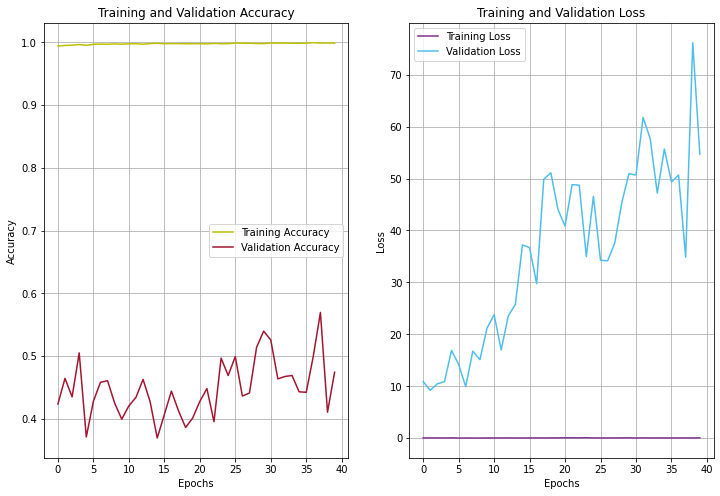

In [ ]:
epochs_range = range(epochs)

fig=plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, hist['accuracy'], label='Training Accuracy', color=[0.75, 0.75, 0])
plt.plot(epochs_range, hist['val_accuracy'], label='Validation Accuracy', color= 	[0.6350, 0.0780, 0.1840])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, hist['loss'], label='Training Loss', color=	[0.4940, 0.1840, 0.5560])
plt.plot(epochs_range, hist['val_loss'], label='Validation Loss', color= [0.3010, 0.7450, 0.9330])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()
#fig.savefig('TrainHistory_LSTM_1.pdf')

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy*100))

val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Validation Accuracy:  {:.4f}".format(val_accuracy*100))

Training Accuracy: 99.9733
Validation Accuracy:  47.4269


In [ ]:
#Predicting on the Validation Data
y_predict_validation = model.predict(X_test)
# Classification Reports
##Converting on hote encoded labels and predictions to single-digit ones
report_classification = classification_report(np.argmax(y_test,axis=1), np.argmax(y_predict_validation,axis=1), target_names = Class_Name)
print(report_classification)

                              precision    recall  f1-score   support

                safe driving       0.29      0.09      0.13       412
             texting - right       0.71      0.67      0.69       339
talking on the phone - right       0.85      0.56      0.68       348
              texting - left       0.57      0.67      0.62       399
 talking on the phone - left       0.45      0.45      0.45       396
         operating the radio       0.37      0.79      0.51       403
                    drinking       0.94      0.49      0.64       392
             reaching behind       0.69      0.62      0.65       334
             hair and makeup       0.16      0.25      0.19       332
        talking to passenger       0.17      0.13      0.15       337

                    accuracy                           0.47      3692
                   macro avg       0.52      0.47      0.47      3692
                weighted avg       0.52      0.47      0.47      3692



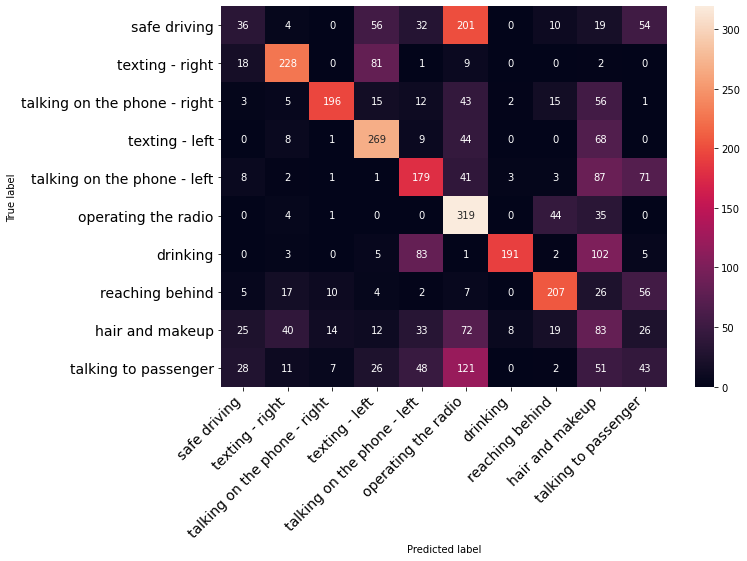

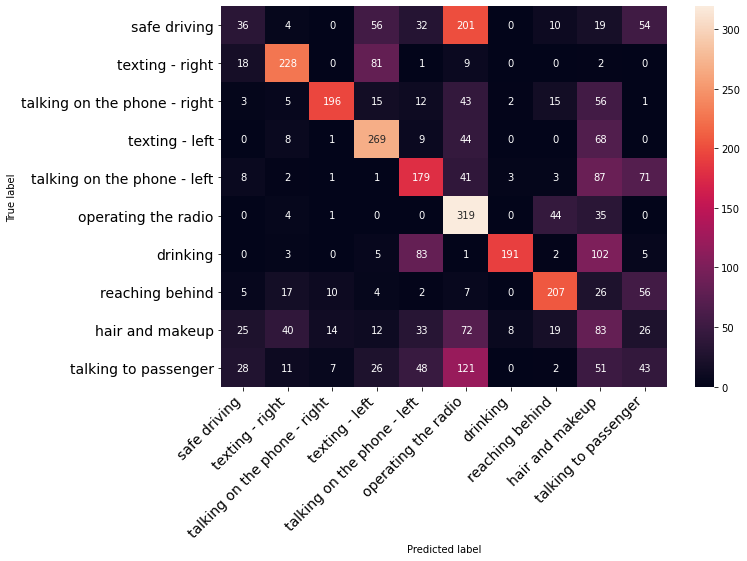

In [ ]:
# Creates a confusion matrix
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_predict_validation,axis=1)) 
print_confusion_matrix(cm,Class_Name)

##CNN Model - Model 2

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(224, 224, 3)))
model.add(Conv2D(filters=32,kernel_size=(5,5),strides = (1,1),padding='same',activation='relu',name='Conv_1'))
model.add(keras.layers.MaxPool2D(pool_size = (2,2),name = 'Pool_1'))#Image_size: 32*64*64(32 filters,image_size 64*64)
model.add(Conv2D( filters = 64, kernel_size = (5,5), strides = (1,1), padding = 'same', activation = 'relu', name = 'Conv_2'))
model.add(keras.layers.MaxPool2D(pool_size = (2,2),name = 'Pool_2'))#Image_size: 64*32*32(64 filters,image_size 32*32)
model.add(Conv2D(  filters = 128,  kernel_size = (5,5),  strides = (1,1),  padding = 'same',  activation = 'relu',  name = 'Conv_3'))
model.add(keras.layers.MaxPool2D(pool_size = (2,2),name = 'Pool_3'))#Image_size: 128*16*16(128 filters,image_size 16*16)
model.add(Conv2D(filters = 256,kernel_size = (5,5),strides = (1,1),padding = 'same',activation = 'relu',name = 'Conv_4'))
model.add(keras.layers.MaxPool2D(   pool_size = (2,2),   name = 'Pool_4'))#Image_size: 256*8*8(256 filters,image_size 8*8)
model.add(Flatten())
model.add(Dense(units=1024, activation='relu',name = 'fc_1'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=512, activation='relu',name = 'fc_2'))
model.add(Dense(units=10,activation='softmax',name = 'fc_3'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
Pool_1 (MaxPooling2D)        (None, 112, 112, 32)      0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 112, 112, 64)      51264     
_________________________________________________________________
Pool_2 (MaxPooling2D)        (None, 56, 56, 64)        0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 56, 56, 128)       204928    
_________________________________________________________________
Pool_3 (MaxPooling2D)        (None, 28, 28, 128)       0         
_________________________________________________________________
Conv_4 (Conv2D)              (None, 28, 28, 256)       8

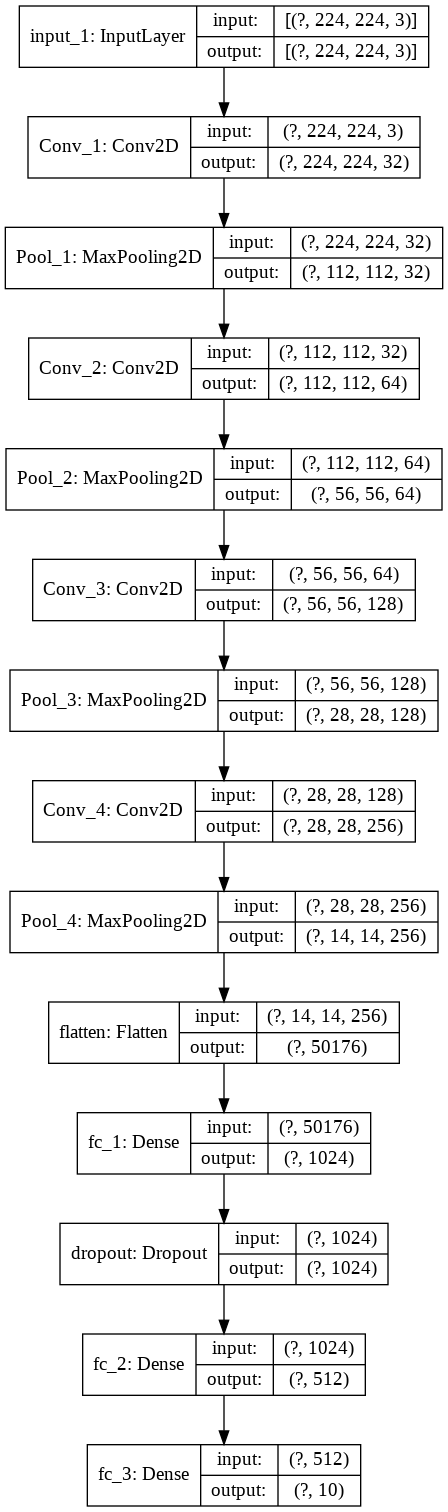

In [ ]:
keras.utils.plot_model(model,"model.png",show_shapes = True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(from_logits = False), metrics = ['accuracy'])
epochs = 10
history = model.fit(X_train,y_train,validation_data = (X_test, y_test),epochs = epochs, batch_size = 500, verbose = 1)

Epoch 1/10
38/38 [==============================] - 14s 363ms/step - loss: 27.2737 - accuracy: 0.2553 - val_loss: 3.0650 - val_accuracy: 0.2321
Epoch 2/10
38/38 [==============================] - 12s 327ms/step - loss: 0.4389 - accuracy: 0.8657 - val_loss: 4.5161 - val_accuracy: 0.2294
Epoch 3/10
38/38 [==============================] - 12s 328ms/step - loss: 0.1161 - accuracy: 0.9666 - val_loss: 4.4870 - val_accuracy: 0.2362
Epoch 4/10
38/38 [==============================] - 12s 329ms/step - loss: 0.0481 - accuracy: 0.9856 - val_loss: 5.1954 - val_accuracy: 0.2844
Epoch 5/10
38/38 [==============================] - 13s 329ms/step - loss: 0.0343 - accuracy: 0.9893 - val_loss: 7.2597 - val_accuracy: 0.2210
Epoch 6/10
38/38 [==============================] - 12s 329ms/step - loss: 0.0409 - accuracy: 0.9879 - val_loss: 4.9603 - val_accuracy: 0.2939
Epoch 7/10
38/38 [==============================] - 12s 329ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 7.8707 - val_accuracy: 0.232

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(5)

loss  accuracy  val_loss  val_accuracy  epoch
5  0.040931  0.987935  4.960295      0.293879      5
6  0.020813  0.993380  7.870728      0.232124      6
7  0.022574  0.993167  7.279766      0.273294      7
8  0.020980  0.994555  6.881396      0.278982      8
9  0.016626  0.995356  6.815923      0.273835      9

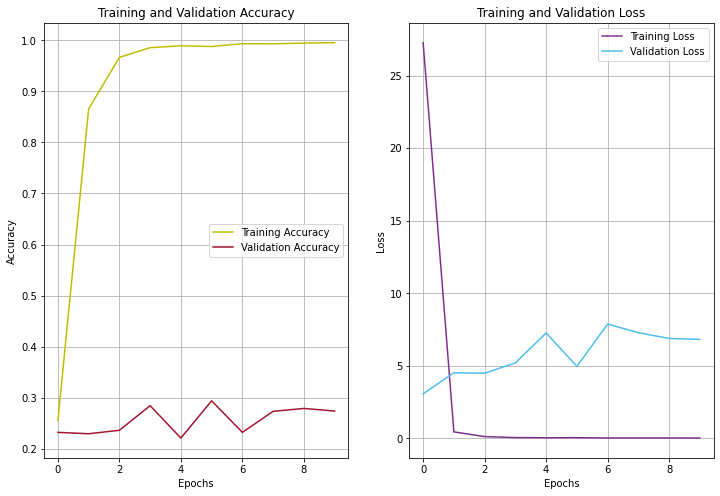

In [ ]:
epochs_range = range(epochs)

fig=plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, hist['accuracy'], label='Training Accuracy', color=[0.75, 0.75, 0])
plt.plot(epochs_range, hist['val_accuracy'], label='Validation Accuracy', color= 	[0.6350, 0.0780, 0.1840])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, hist['loss'], label='Training Loss', color=	[0.4940, 0.1840, 0.5560])
plt.plot(epochs_range, hist['val_loss'], label='Validation Loss', color= [0.3010, 0.7450, 0.9330])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()
#fig.savefig('TrainHistory_LSTM_1.pdf')

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy*100))

val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Validation Accuracy:  {:.4f}".format(val_accuracy*100))

Training Accuracy: 99.7277
Validation Accuracy:  27.3835


In [ ]:
#Predicting on the Validation Data
y_predict_validation = model.predict(X_test)
# Classification Reports
##Converting on hote encoded labels and predictions to single-digit ones
report_classification = classification_report(np.argmax(y_test,axis=1), np.argmax(y_predict_validation,axis=1), target_names = Class_Name)
print(report_classification)

                              precision    recall  f1-score   support

                safe driving       0.30      0.25      0.28       412
             texting - right       0.71      0.28      0.40       339
talking on the phone - right       0.38      0.13      0.19       348
              texting - left       0.48      0.30      0.37       399
 talking on the phone - left       0.17      0.06      0.09       396
         operating the radio       0.61      0.38      0.47       403
                    drinking       1.00      0.06      0.12       392
             reaching behind       0.66      0.54      0.60       334
             hair and makeup       0.13      0.41      0.19       332
        talking to passenger       0.11      0.36      0.17       337

                    accuracy                           0.27      3692
                   macro avg       0.46      0.28      0.29      3692
                weighted avg       0.46      0.27      0.29      3692



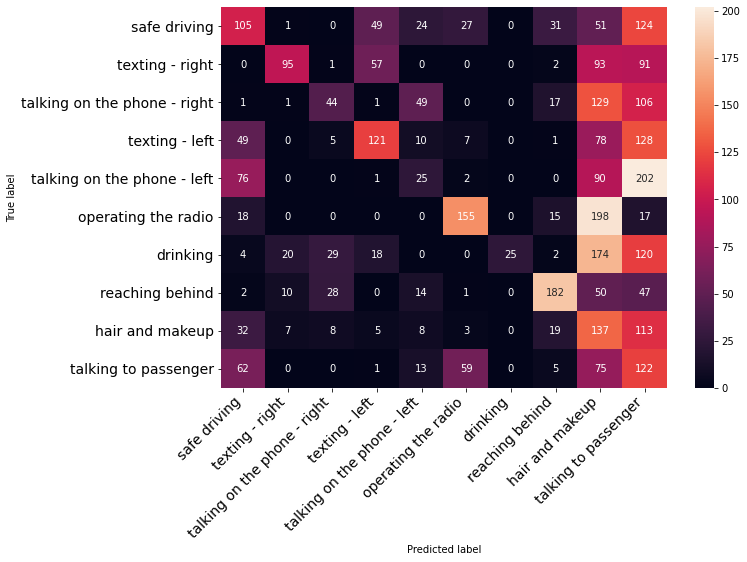

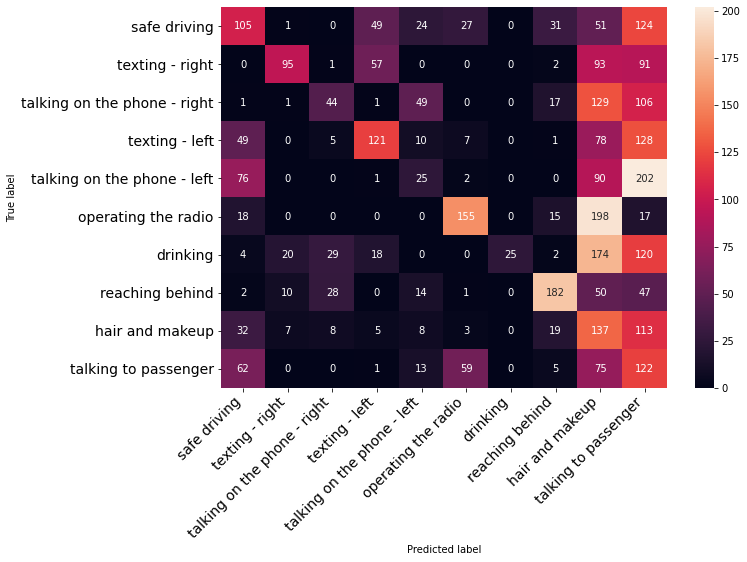

In [ ]:
# Creates a confusion matrix
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_predict_validation,axis=1)) 
print_confusion_matrix(cm,Class_Name)

#Transfer Learning

##RESNET50 -No Extra Layer

In [ ]:
## Defining the input

from keras.layers import Input
resnet50_input = Input(shape = (224, 224, 3), name = 'Image_input')

## The RESNET model

from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.resnet50 import ResNet50


#Get the RESNET weights and layers

model_resnet50_conv = ResNet50(weights= 'imagenet', include_top=False, input_shape= (224,224,3))
model_resnet50_conv.summary()

In [ ]:
#Use the generated model 
from keras.models import Model

output_resnet50_conv = model_resnet50_conv(resnet50_input)

#Add the fully-connected layers 

x = Flatten(name='flatten')(output_resnet50_conv)
x = Dense(10, activation='softmax', name='predictions')(x)


resnet50_pretrained = Model(inputs = resnet50_input, outputs = x)
# for layer in resnet50_pretrained.layers[:2]:
#     layer.trainable=False
# for layer in resnet50_pretrained.layers[2:]:
#     layer.trainable=True

resnet50_pretrained.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Image_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
predictions (Dense)          (None, 10)                1003530   
Total params: 24,591,242
Trainable params: 24,538,122
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
from keras.callbacks import LearningRateScheduler, EarlyStopping

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0)


def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,  
        math.floor((1+epoch)/epochs_drop))
    return lrate


lrate = LearningRateScheduler(step_decay)

sgd = optimizers.SGD(lr = 0.001)

# Compile CNN model
resnet50_pretrained.compile(loss='categorical_crossentropy',optimizer = sgd,metrics=['accuracy'])

In [ ]:
import math
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping

checkpointer = ModelCheckpoint('resnet_weights_trained.hdf5', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='accuracy', patience=7, verbose=1)

datagen = ImageDataGenerator(
    height_shift_range=0.5,
    width_shift_range = 0.5,
    zoom_range = 0.5,
    rotation_range=30
        )
#datagen.fit(X_train)
data_generator = datagen.flow(X_train, y_train, batch_size = 64)

# Fits the model on batches with real-time data augmentation:
resnet50_model = resnet50_pretrained.fit_generator(data_generator,steps_per_epoch = len(X_train) / 64, callbacks=[checkpointer, earlystopper,lrate],
                                                            epochs = 40, verbose = 1, validation_data = (X_test, y_test))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
293/292 [==============================] - ETA: 0s - loss: 2.5934 - accuracy: 0.3487
Epoch 00001: val_loss improved from inf to 1.42785, saving model to resnet_weights_trained.hdf5
293/292 [==============================] - 213s 726ms/step - loss: 2.5934 - accuracy: 0.3487 - val_loss: 1.4279 - val_accuracy: 0.6324
Epoch 2/40
293/292 [==============================] - ETA: 0s - loss: 1.4030 - accuracy: 0.5957
Epoch 00002: val_loss improved from 1.42785 to 0.99357, saving model to resnet_weights_trained.hdf5
293/292 [==============================] - 212s 723ms/step - loss: 1.4030 - accuracy: 0.5957 - val_loss: 0.9936 - val_accuracy: 0.7319
Epoch 3/40
293/292 [==============================] - ETA: 0s - loss: 1.0282 - accuracy: 0.6924
Epoch 00003: val_loss did not improve from 0.99357
293/292 [==============================] - 211s 719ms/step - loss: 1.0282 - accuracy: 0.6924 - val_loss: 1.0927 - val_a

In [ ]:
hist = pd.DataFrame(resnet50_model.history)
hist['epoch'] = resnet50_model.epoch
hist.tail(5)

loss  accuracy  val_loss  val_accuracy        lr  epoch
35  0.312152  0.893658  0.853008      0.826110  0.000125     35
36  0.305284  0.895526  0.840949      0.830715  0.000125     36
37  0.301823  0.897822  0.887291      0.822860  0.000125     37
38  0.300481  0.900011  0.838762      0.823673  0.000125     38
39  0.293823  0.899157  0.851449      0.826381  0.000063     39

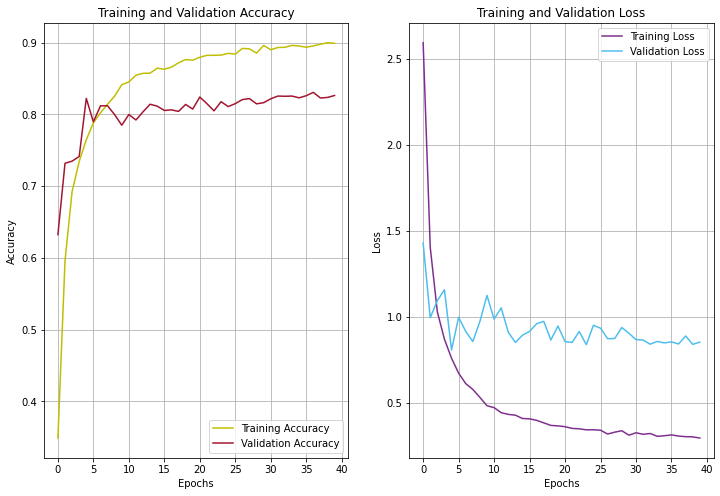

In [ ]:
epochs_range = range(40)

fig=plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, hist['accuracy'], label='Training Accuracy', color=[0.75, 0.75, 0])
plt.plot(epochs_range, hist['val_accuracy'], label='Validation Accuracy', color= 	[0.6350, 0.0780, 0.1840])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, hist['loss'], label='Training Loss', color=	[0.4940, 0.1840, 0.5560])
plt.plot(epochs_range, hist['val_loss'], label='Validation Loss', color= [0.3010, 0.7450, 0.9330])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()
#fig.savefig('TrainHistory_LSTM_1.pdf')

In [ ]:
test_loss, test_accuracy = resnet50_pretrained.evaluate(X_test, y_test, verbose=False)
print("Validation Accuracy:  {:.4f}".format(test_accuracy*100))

train_loss, train_accuracy = resnet50_pretrained.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy:  {:.4f}".format(train_accuracy*100))

Validation Accuracy:  82.6381
Training Accuracy:  99.0498


In [ ]:
#Predicting on the Validation Data
y_predict_validation = loaded_model.predict(X_test)
report_classification = classification_report(np.argmax(y_test,axis=1), np.argmax(y_predict_validation,axis=1), target_names = Class_Name)
print(report_classification)

                              precision    recall  f1-score   support

                safe driving       0.79      0.78      0.78       412
             texting - right       0.98      0.85      0.91       339
talking on the phone - right       0.96      0.91      0.93       348
              texting - left       0.97      0.97      0.97       399
 talking on the phone - left       0.96      0.72      0.83       396
         operating the radio       0.88      0.86      0.87       403
                    drinking       0.85      0.91      0.88       392
             reaching behind       0.83      0.89      0.86       334
             hair and makeup       0.46      0.58      0.51       332
        talking to passenger       0.65      0.71      0.68       337

                    accuracy                           0.82      3692
                   macro avg       0.83      0.82      0.82      3692
                weighted avg       0.84      0.82      0.83      3692



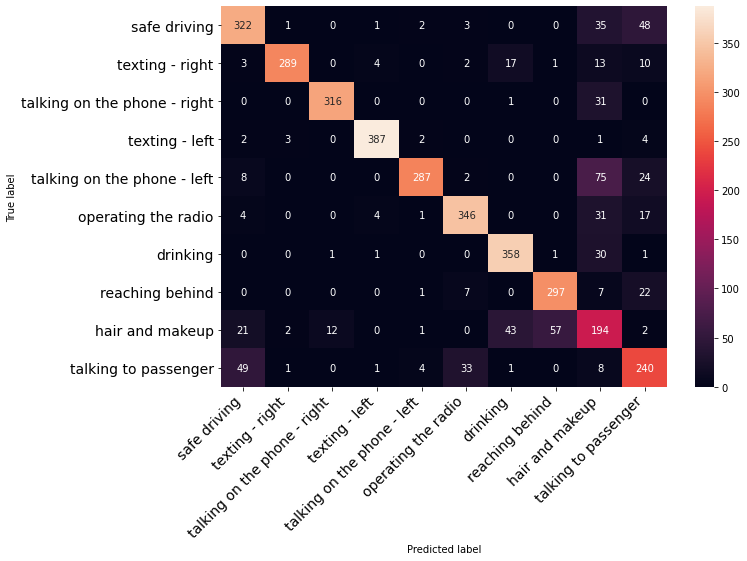

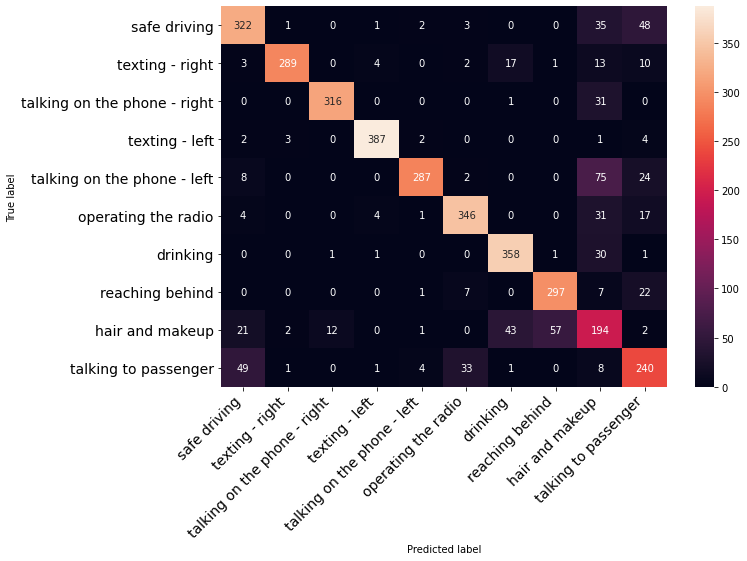

In [ ]:
# Creates a confusion matrix
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_predict_validation,axis=1)) 
print_confusion_matrix(cm,Class_Name)

###Model Prediction on Test Data (Unseen Data)

In [ ]:
!unzip /content/gdrive/MyDrive/CBMS_ML_257_TeamProject_Artifacts/Sample_test2.zip -d sample_test_2 

Archive:  /content/gdrive/MyDrive/CBMS_ML_257_TeamProject_Artifacts/Sample_test2.zip
   creating: sample_test_2/Sample_test2/
  inflating: sample_test_2/Sample_test2/img_507.jpg  
  inflating: sample_test_2/__MACOSX/Sample_test2/._img_507.jpg  
  inflating: sample_test_2/Sample_test2/img_512.jpg  
  inflating: sample_test_2/__MACOSX/Sample_test2/._img_512.jpg  
  inflating: sample_test_2/Sample_test2/img_506.jpg  
  inflating: sample_test_2/__MACOSX/Sample_test2/._img_506.jpg  
  inflating: sample_test_2/Sample_test2/img_538.jpg  
  inflating: sample_test_2/__MACOSX/Sample_test2/._img_538.jpg  
  inflating: sample_test_2/Sample_test2/img_504.jpg  
  inflating: sample_test_2/__MACOSX/Sample_test2/._img_504.jpg  
  inflating: sample_test_2/Sample_test2/img_505.jpg  
  inflating: sample_test_2/__MACOSX/Sample_test2/._img_505.jpg  
  inflating: sample_test_2/Sample_test2/img_511.jpg  
  inflating: sample_test_2/__MACOSX/Sample_test2/._img_511.jpg  
  inflating: sample_test_2/Sample_test2/i

Image number: 0
Image number: 1
Image number: 2
Image number: 3
Image number: 4
Image number: 5
Image number: 6
Image number: 7
Image number: 8
Image number: 9
Image number: 10
Image number: 11
Image number: 12
Image number: 13
Image number: 14
Image number: 15
Image number: 16
Image number: 17
Image number: 18
Image number: 19


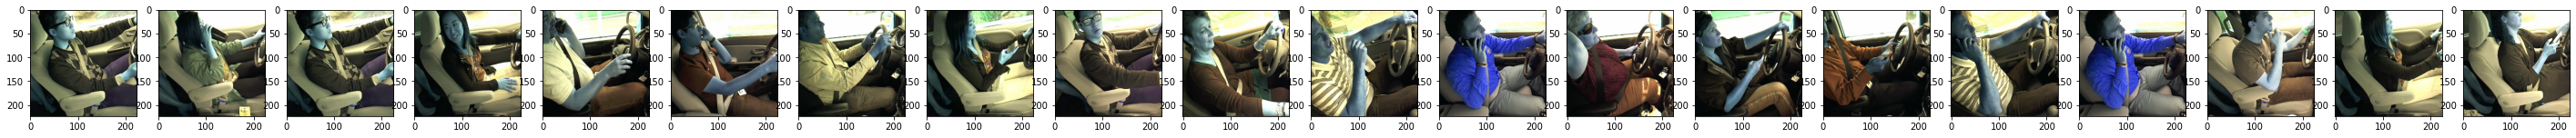

In [ ]:
import cv2
test_image = []
i = 0
fig, ax = plt.subplots(1, 20, figsize = (50,50 ))

files = os.listdir('/content/sample_test_2/Sample_test2')
nums = np.random.randint(low=1, high=len(files), size=20)
for i in range(20):
    print ('Image number:',i)
    img = cv2.imread('/content/sample_test_2/Sample_test2/'+files[nums[i]])
    #img = color.rgb2gray(img)
    img = img[50:,120:-50]
    img = cv2.resize(img,(224,224))
    test_image.append(img)
    ax[i].imshow(img,cmap = 'gray')
    plt.show

In [ ]:
#Load saved model for inference 
loaded_model = tf.keras.models.load_model('/content/resnet_weights_trained.hdf5')

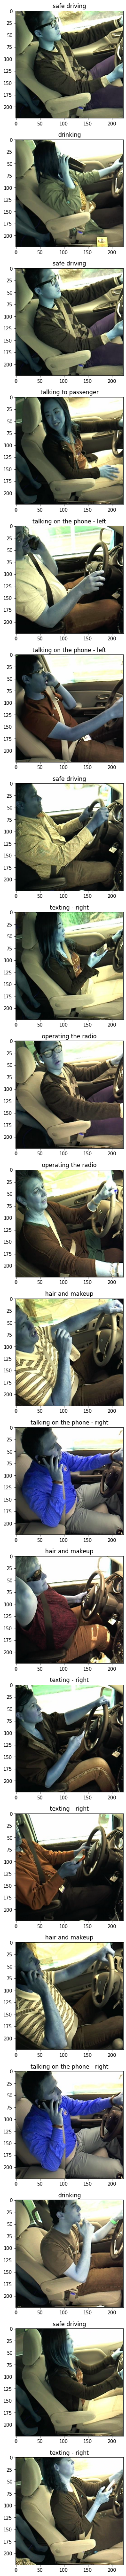

In [ ]:
test = []

for img in test_image:
    test.append(img)
    
#resnet50_pretrained.load_weights('resnet_weights_aug_alltrained_sgd2_setval.hdf5')


test = np.array(test).reshape(-1,224,224,3)
prediction = loaded_model.predict(test)

tags = { "C0": "safe driving",
"C1": "texting - right",
"C2": "talking on the phone - right",
"C3": "texting - left",
"C4": "talking on the phone - left",
"C5": "operating the radio",
"C6": "drinking",
"C7": "reaching behind",
"C8": "hair and makeup",
"C9": "talking to passenger" }

# labels is the image array
i = 0
fig, ax = plt.subplots(20, 1, figsize = (100,100))

for i in range(20):
    ax[i].imshow(test[i].squeeze())
    predicted_class = 'C'+str(np.where(prediction[i] == np.amax(prediction[i]))[0][0])
    ax[i].set_title(tags[predicted_class])
    plt.show

In [ ]:
resnet50_pretrained.save('resnet50_pretrained_82.h5')

In [ ]:
# Load Test data for inference 
Xnewtest =load('/content/gdrive/MyDrive/CBMS_ML_257_TeamProject_Artifacts/Xnewtest.npy')

In [ ]:
Ynewtest =load('/content/gdrive/MyDrive/CBMS_ML_257_TeamProject_Artifacts/y_test_new.npy')

In [ ]:
Ynewtest.shape

(295,)

In [ ]:
#Predicting on the Validation Data
y_predict_validation = loaded_model.predict(Xnewtest)
# Classification Reports
##Converting on hote encoded labels and predictions to single-digit ones
report_classification = classification_report(Ynewtest, np.argmax(y_predict_validation,axis=1), target_names = Class_Name)
print(report_classification)

                              precision    recall  f1-score   support

                safe driving       0.87      0.71      0.78        38
             texting - right       0.94      0.92      0.93        36
talking on the phone - right       0.97      0.76      0.85        37
              texting - left       0.95      0.78      0.86        27
 talking on the phone - left       0.97      0.91      0.94        35
         operating the radio       0.83      0.94      0.88        32
                    drinking       0.93      0.90      0.92        31
             reaching behind       1.00      0.83      0.91        35
             hair and makeup       0.19      1.00      0.32         6
        talking to passenger       0.61      0.61      0.61        18

                    accuracy                           0.83       295
                   macro avg       0.83      0.84      0.80       295
                weighted avg       0.90      0.83      0.85       295



In [ ]:
y_predict_validation.shape

(295, 10)

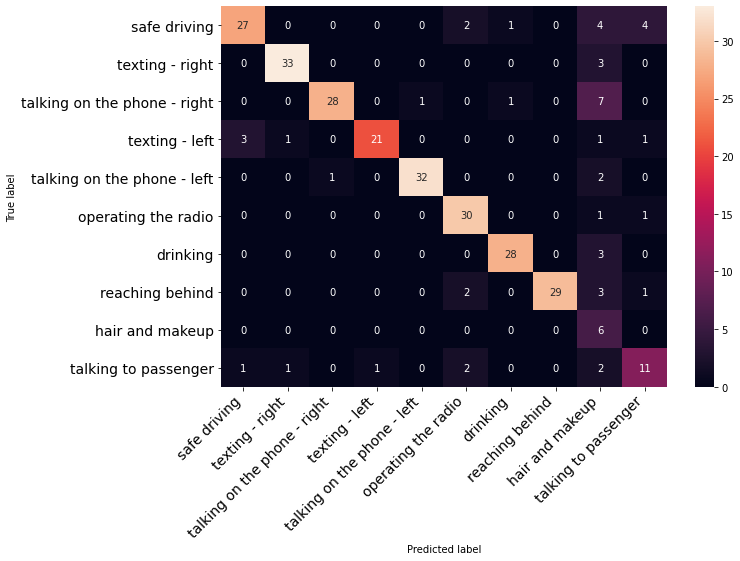

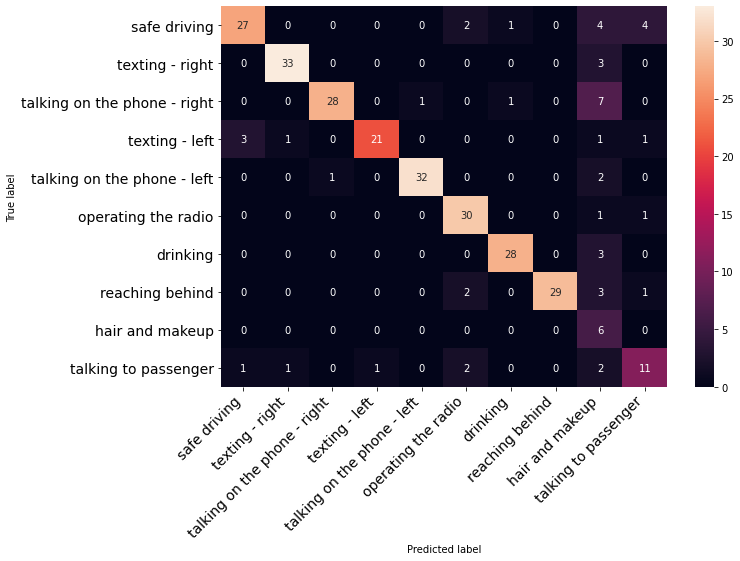

In [ ]:
# Creates a confusion matrix
cm = confusion_matrix(Ynewtest, np.argmax(y_predict_validation,axis=1)) 
print_confusion_matrix(cm,Class_Name)

In [ ]:
from sklearn.metrics import log_loss

ll_sk = log_loss(Ynewtest, y_predict_validation)
print("log_loss",ll_sk)

log_loss 0.7052677867388167


#Inference on  our own image 

In [ ]:
loaded_model = tf.keras.models.load_model('gdrive/My Drive/CBMS_ML_257_TeamProject_Artifacts/resnet_weights_trained.hdf5')

In [ ]:
from keras.preprocessing import image  
img1 = image.load_img('/content/Driver_Image.JPG',target_size=(224, 224))
img2 = image.load_img('/content/Driver_drinking.JPG',target_size=(224, 224))
x = np.expand_dims(image.img_to_array(img1), axis=0)
x1 =  np.expand_dims(image.img_to_array(img2), axis=0)
# convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor

print(x.shape , x1.shape)
y_pred = loaded_model.predict(x)
y_pred_1 = loaded_model.predict(x1)
print(y_pred , y_pred_1)

(1, 224, 224, 3) (1, 224, 224, 3)
[[9.9513888e-01 4.9941747e-07 1.8418119e-07 1.5195146e-05 2.3658886e-10
  4.0094716e-10 2.2854717e-06 3.3396962e-05 6.7510700e-04 4.1344338e-03]] [[2.4253130e-01 5.1170555e-06 9.8946148e-06 5.3063642e-09 1.2382850e-06
  7.2037246e-08 8.2994951e-03 1.2569200e-05 7.4785095e-01 1.2894252e-03]]


0


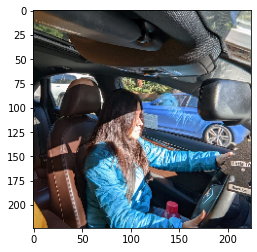

In [ ]:
plt.imshow(img1)
print(np.argmax(y_pred))

#Model Comparison

In [ ]:
Comparison_df_2 = pd.read_excel("/content/ModelComparison2.xlsx")

In [ ]:
Comparison_df_2

Model Name  Accuracy  WeightedPrecision  Weighted Recall  Weighted F1-score
0          SVM     0.496               0.48             0.44               0.45
1          KNN     0.462               0.40             0.40               0.40
2          MLP     0.520               0.39             0.36               0.35
3  Vanilla CNN     0.477               0.52             0.47               0.47
4    RESTNET50     0.830               0.83             0.84               0.80
5        VGG16     0.820               0.82             0.83               0.79
6    MOBILENET     0.880               0.83             0.85               0.83

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


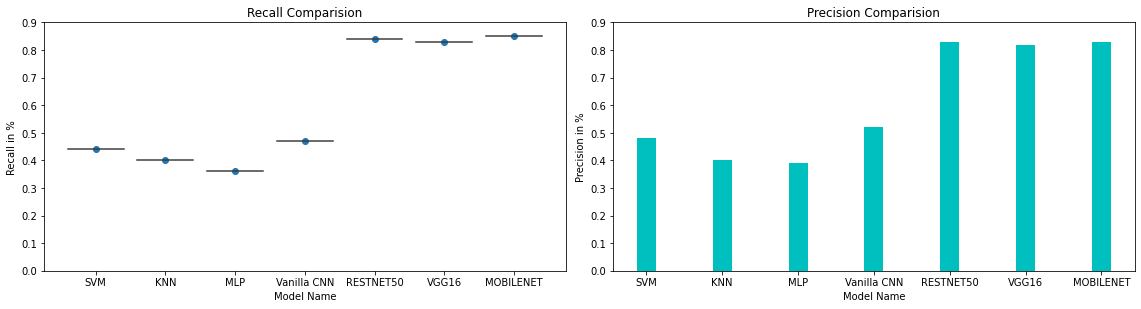

In [ ]:
fig=plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.violinplot(Comparison_df_2["Model Name"], Comparison_df_2["Weighted Recall"], scale='width', inner='quartile')
plt.scatter(Comparison_df_2["Model Name"], Comparison_df_2["Weighted Recall"])
plt.ylim(0,0.9)
plt.ylabel('Recall in %')
plt.title('Recall Comparision')


plt.subplot(2,2,2)
plt.bar(Comparison_df_2["Model Name"], Comparison_df_2["WeightedPrecision"], color='c', width=.25)
plt.ylim(0,0.9)
plt.ylabel('Precision in %')
plt.xlabel('Model Name')
plt.title('Precision Comparision')
plt.tight_layout()
#fig.savefig("comparision_results_Precision Recall.pdf")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


<function matplotlib.pyplot.show>

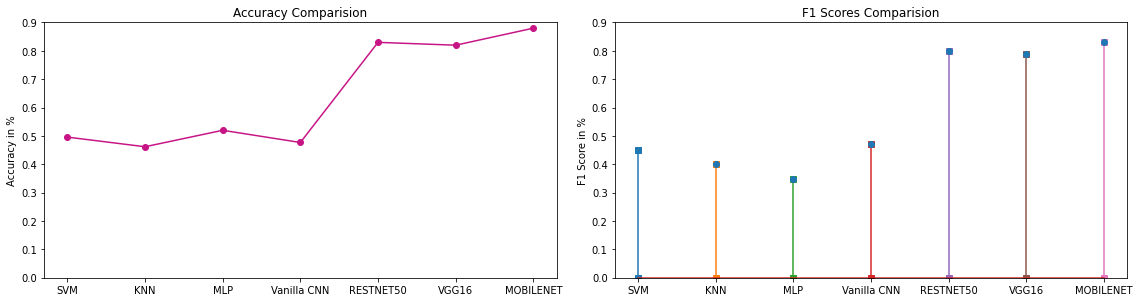

In [ ]:
fig=plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(Comparison_df_2["Model Name"], Comparison_df_2["Accuracy"], marker='o', color='mediumvioletred')
plt.title("Accuracy Comparision")
plt.ylabel('Accuracy in %')
plt.ylim(0,0.9)

plt.subplot(2,2,2)
plt.stem(Comparison_df_2["Model Name"], Comparison_df_2["Weighted F1-score"], '-s')
plt.ylim(0,0.9)
plt.title("F1 Scores Comparision")
plt.ylabel('F1 Score in %')
plt.tight_layout()
fig.savefig("comparision_results_F1Score_Accuracy.pdf")
plt.show

##**References**


https://engmrk.com/kerasapplication-pre-trained-model/?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com

https://scikit-learn.org/stable/glossary.html#term-random-state

https://www.kaggle.com/snide713/distracted-driver-detection/comments

https://towardsdatascience.com/distracted-driver-detection-using-deep-learning-e893715e02a4

https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035

https://arxiv.org/abs/1512.03385


https://paperswithcode.com/method/resnet

https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624

https://medium.com/alumnaiacademy/introduction-to-computer-vision-4fc2a2ba9dc